In [190]:
import qiskit
from qiskit import *

# Representing Data
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

# Monitor Job on Real Machine
from qiskit.tools.monitor import job_monitor

import numpy as np
from functools import reduce # perform sucessive tensor product

matplotlib.use( 'tkagg' )

## Quantum Gates

### Pauli Gate

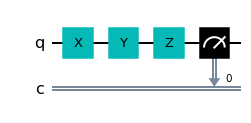

In [105]:
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.y(0)
circ.z(0)
circ.measure(0, 0)
circ.draw('mpl')

### Hadamard Gate

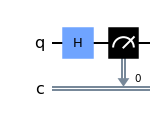

In [106]:
circ = QuantumCircuit(1, 1)
circ.h(0)
circ.measure(0, 0)
circ.draw('mpl')

### Controlled-Not Gate

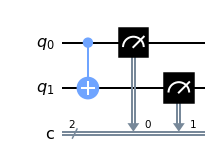

In [104]:
circ = QuantumCircuit(2, 2)
circ.cx(0, 1)
circ.measure([0,1], [0,1])
circ.draw('mpl')

## Common Basis Vectors

In [108]:
# Useful for Initializing a New Circuit

zero = np.array([[1], [0]])
one =  np.array([[0], [1]])

plus = np.array([[1], [1]])/np.sqrt(2) # X plus basis state
minus = np.array([[1], [-1]])/np.sqrt(2) # X minus basis state

B00 = np.array([[1], [0], [0], [1]])/np.sqrt(2) # Bell of 00
B01 = np.array([[0], [1], [1], [0]])/np.sqrt(2) # Bell of 01
B10 = np.array([[1], [0], [0], [-1]])/np.sqrt(2) # Bell of 10
B11 = np.array([[0], [-1], [1], [0]])/np.sqrt(2) # Bell of 11

## Initialize New CIrcuit

In [297]:
def new_circuit(qubits, cbits = None, *initial_state, drawing = True):
    
    """
    
    Initialize a new circ with an arbitray statevector

    Parameters
    ----------
    no_qubits: int
        Number of qubits intitialized
    initial_state: np.array
        All the separable statevectors and non-separable statevectors

    Returns
    -------
    circ: qiskit.circuit.quantumcircuit.QuantumCircuit
        An initialized Circuit
        
    """
    
    # Default to cbits = qubits unless a specific number is given
    cbits = qubits if cbits == None else cbits
    
    # Default to all 0 states for all qubits if no initial_state is given
    initial_state = [zero for i in range(qubits)] if initial_state == () else initial_state
    
    
    if len(initial_state) == 2:
        initial_state == [initial_state]
        
    
    # Successively calculate the tensor product
    initial_state = reduce(lambda x, y: np.kron(x, y), initial_state)
    
    
    # Reshape to make statevector compatible with the initialize method
    initial_state = initial_state.reshape(2**qubits)
    
    
    # Create Circuit
    circ = QuantumCircuit(qubits, cbits)
    circ.initialize(initial_state, range(qubits))
    circ.barrier()
    
    # Draw Circuit
    if drawing:
        circ.draw('mpl')
    
    return circ

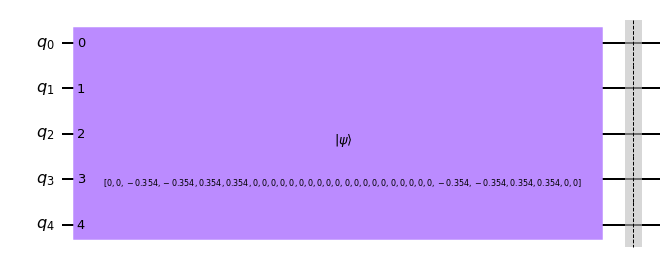

In [239]:
# Example
circ = new_circuit(5, B00, B11, plus)

## Representing Results

There are five step to representing the result of a circuit

### 1. Compose Circuit

### 2. Define Simulator

In [ ]:
simulator = Aer.get_backend('')

'''There are several different option for backend

Mathematical Simulator: 

statevector_simulator
unitary_simulator

Experimental Simulator: 

ibmq_qasm_simulator (Classical Simulation)

(The rest are real quantum machines / Providers)

ibmq_16_melbourne 
ibmq_ourense
ibmqx2
ibmq_vigo
ibmq_london
ibmq_burlington
ibmq_essex
ibmq_armonk
ibmq_valencia
ibmq_santiago'''

### 3. Execute Circuit with Simulators

In [116]:
# For Mathematical Representation
results = execute(circ, simulator).result()

# For Experimental Representation

IBMQ.load_account()  # Enter Unique User Id here

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_qasm_simulator')

job = execute(circuit, backend = qcomp, shots = )

job_monitor(job)

results = job.result()

SyntaxError: invalid syntax (<ipython-input-116-4df3b5863234>, line 12)

### 4. Count Results

In [117]:
# Statevector
statevector = results.get_statevector(circ)

# Unitary
unitary = results.get_unitary(circ)

# Counts 
counts = results.get_counts(circ)

AttributeError: 'AerJob' object has no attribute 'get_statevector'

### 5. Display Results

In [19]:
# Plot Bloch Sphere (Represent the statevector as a ray on the Bloch Sphere)
plot_bloch_multivector(statevector)

# Plot State City (Represent the amplitude of the bases of the statevector)
plot_state_city(statevector)

# Plot Histogram (Represent counts of each measurement)
plot_histogram(counts)

SyntaxError: invalid syntax (<ipython-input-19-c79edcc7d842>, line 16)

## GHZ Generator

In [341]:
def GHZ(qubits, *initial_state, drawing = True):
    
    """
    Create a GHZ state by successive CNOT from provided statevector 
    (This is a multi-qubit entanglemnt system)

    Parameters
    ----------
    no_qubits: int
        Number of qubits intitialized
    initial_state: np.array
        All the separable statevectors and non-separable statevectors

    Returns
    -------
    circ: qiskit.circuit.quantumcircuit.QuantumCircuit
        An circuit with GHZ gates built in to it
        
    """
    
    circ = new_circuit(qubits, *initial_state, drawing = False)

    circ.h(0)
    
    for i in range(qubits-1):
        circ.cx(i, i+1)
        
    circ.barrier()
        
    # Draw Circuit
    if drawing:
        circ.draw('mpl')
    
    return circ

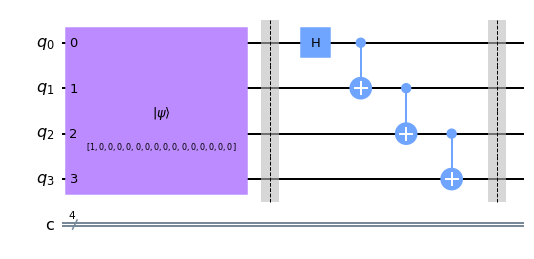

In [342]:
circ = GHZ(4)

## Measurement

In [343]:
def measurement(circ, qubits = [], cbits = [], drawing = True):
    
    """
    Add Measurement Gates to Circuit

    Parameters
    ----------
    no_qubits: int
        Number of qubits intitialized
    initial_state: np.array
        All the separable statevectors and non-separable statevectors

    Returns
    -------
    circ: qiskit.circuit.quantumcircuit.QuantumCircuit
        An circuit with GHZ gates built in to it
        
    """
    
    n = circ.num_qubits

    # Measure All
    if qubits == []:
        circ.measure(range(n), range(n))
        
    # Measure Selected Qubits
    else:
        circ.measure(qubits, cbits)
        
    # Draw Circuit
    if drawing:
        circ.draw('mpl')
        
        return circ

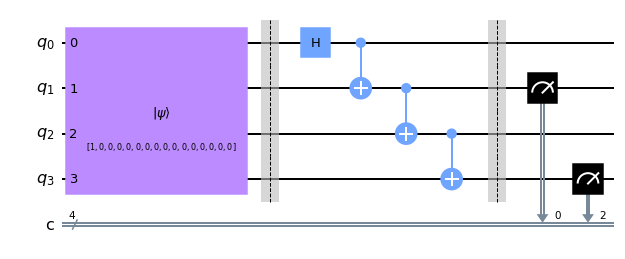

In [344]:
measurement(circ, [1, 3], [0, 2])

## Quantum Algorithms

### Quantum Teleportation

#Typing checking and typing hinting 